<a href="https://colab.research.google.com/github/htcysl/Machine-Learning-/blob/main/Hatice_Uysal_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

Generate data

In [3]:
def generateData(m, noiseLevel=0.05, randomSeed=123):

    # create a grid
    W = 7
    nx, ny = (m, m)
    x = np.linspace(0, W, nx)
    y = np.linspace(0, W, ny)
    xv, yv = np.meshgrid(x, y)

    xv = xv.reshape(-1, 1)
    yv = yv.reshape(-1, 1)
    y = np.zeros(len(xv)).reshape(-1, 1)

    # create labels
    x_c = 4
    y_c = 3
    r1 = 2.5
    r2 = 2.3
    y[np.logical_and((xv-x_c)**2 + (yv-y_c)**2 <= r1**2, yv > 3)] = 1
    y[(xv-x_c)**2 + (yv-y_c)**2 <= r2**2] = 2
    y[np.logical_and((xv-x_c)**2 + (yv-y_c)**2 <= (r1+0.25)**2, np.abs(xv - yv) <= 0.1)] = 3

    # remove background
    xv = xv[y>0].reshape(-1, 1)
    yv = yv[y>0].reshape(-1, 1)
    y = y[y>0].reshape(-1, 1)

    # add noise
    np.random.seed(randomSeed)
    xv += noiseLevel * np.random.normal(0, 1, xv.shape)
    yv += noiseLevel * np.random.normal(0, 1, yv.shape)

    X = np.concatenate([xv, yv], axis=1)

    return X, y

In [4]:
m_train = 100
noiseLevel = 0.05
randomSeed = 123
X_train, y_train = generateData(m_train, noiseLevel, randomSeed)

In [5]:
n_train = len(y_train)
print('n_train = ', n_train)
print()

print('class 1 = %5.2f%% ' % (100 * np.sum(y_train == 1) / n_train))
print('class 2 = %5.2f%% ' % (100 * np.sum(y_train == 2) / n_train))
print('class 3 = %5.2f%% ' % (100 * np.sum(y_train == 3) / n_train))

n_train =  3640

class 1 =  8.19% 
class 2 = 87.42% 
class 3 =  4.40% 


In [6]:
print('X.shape = ', X_train.shape)
print('y.shape = ', y_train.shape)

X.shape =  (3640, 2)
y.shape =  (3640, 1)


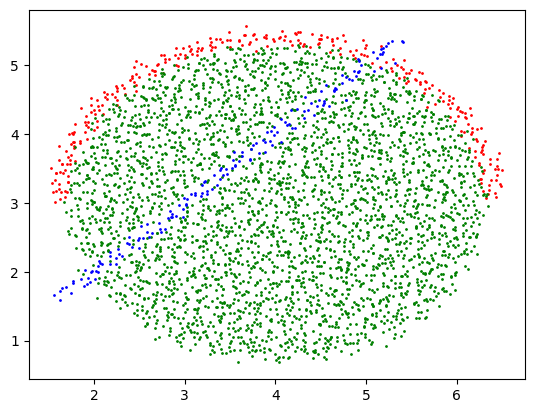

In [7]:
x = X_train[:, 0].reshape(-1, 1)
y = X_train[:, 1].reshape(-1, 1)

plt.scatter(x[y_train==1], y[y_train==1], s=1, c='r')
plt.scatter(x[y_train==2], y[y_train==2], s=1, c='g')
plt.scatter(x[y_train==3], y[y_train==3], s=1, c='b')
plt.show()

In [8]:
m_test = 75
noiseLevel = 0.06
randomSeed = 12345
X_test, y_test = generateData(m_test, noiseLevel, randomSeed)

In [9]:
n_test = len(y_test)
print('n_test = ', n_test)
print()

print('class 1 = %5.2f%% ' % (100 * np.sum(y_test == 1) / n_test))
print('class 2 = %5.2f%% ' % (100 * np.sum(y_test == 2) / n_test))
print('class 3 = %5.2f%% ' % (100 * np.sum(y_test == 3) / n_test))

n_test =  2045

class 1 =  8.17% 
class 2 = 86.01% 
class 3 =  5.82% 


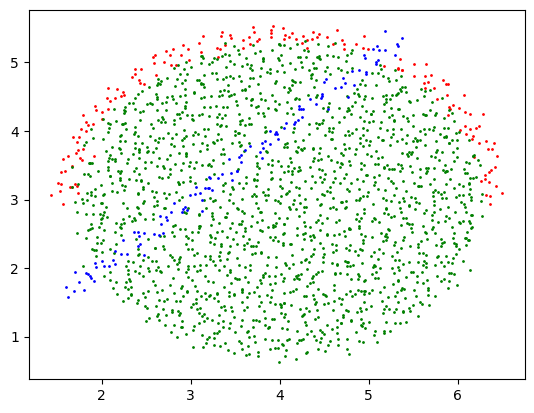

In [10]:
x = X_test[:, 0].reshape(-1, 1)
y = X_test[:, 1].reshape(-1, 1)

plt.scatter(x[y_test==1], y[y_test==1], s=1, c='r')
plt.scatter(x[y_test==2], y[y_test==2], s=1, c='g')
plt.scatter(x[y_test==3], y[y_test==3], s=1, c='b')
plt.show()

# Do training (add student code below, add more cells if you need)

In [11]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis, KNeighborsClassifier)
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

k_range = list(range(1, 20))
scores = []
acc_best = 0
k_best = 0

for i in k_range:

    nca = NeighborhoodComponentsAnalysis(random_state = 123)
    knn = KNeighborsClassifier(n_neighbors=i)
    poly = PolynomialFeatures(2)

    nca_pipe = Pipeline([ ('poly', poly),('nca', nca), ('knn',knn)])

    nca_pipe.fit(X_train, y_train[:,0])

    y_pred = nca_pipe.predict(X_test)
    y_pred = [3 if np.abs(X_test[i, 0] - X_test[i, 1]) <= 0.1 + noiseLevel / 2. else y_pred[i] for i in range(len(y_test))]

    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    if acc_best < acc :
       acc_best = acc
       k_best = i
       knn_best = knn

y_pred = [3 if np.abs(X_test[i, 0] - X_test[i, 1]) <= 0.1 + noiseLevel / 2. else y_pred[i] for i in range(len(y_test))]
plt.plot(k_range, scores)
plt.show()
print(acc_best)

print("Confusion matrix : ")
print(confusion_matrix(y_test,knn_best.fit(X_train, y_train[:,0]).predict(X_test)))
print(f"Best k value : {k_best}")

In [ ]:
from sklearn.metrics import accuracy_score

def parzen(X_train, y_train, X_test, h=0.005):

    n_classes = len(np.unique(y_train))
    n_test = X_test.shape[0]
    pred_classes = np.zeros(n_test, dtype=int)

    for i in range(n_test):
        x_i = X_test[i]
        likelihoods = np.zeros(n_classes)

        for c in range(1, n_classes + 1):   #  c = 1, 2, 3

            class_samples = X_train[y_train[:,0] == c]     # Calculate the class-specific likelihood

            kernel = (1 / (h * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.sum((class_samples - x_i) ** 2, axis=1) / (h ** 2))
            likelihoods[c - 1] = np.sum(kernel)

        # Make a decision based on the likelihoods
        if np.abs( x_i[0]-x_i[1] ) <= 0.1+noiseLevel/2.:
                  pred_classes[i] = 3
        else :
                  pred_classes[i] = np.argmax(likelihoods) + 1

    return pred_classes

In [ ]:
# Use parzen method for various h values

accuracy_best = 0
h = 0.001
acc_scores = []
h_values = []
h_best = 0

for i in range(1,1000):

  y_pred = parzen(X_train, y_train, X_test, h)  # Invoke parzen method

  accuracy = accuracy_score(y_test, y_pred) # Calculate accuracy
  acc_scores.append(accuracy)
  h_values.append(h)

  if accuracy > accuracy_best :
      accuracy_best = accuracy
      h_best = h
  h += 0.002


plt.plot(h_values, acc_scores)
plt.xlabel("Value of h ")
plt.ylabel("Value of Accuracy")
plt.show()

print()
print(f"Best accuracy : {accuracy_best}")
print("Confusion matrix : ")
print(confusion_matrix(y_test,parzen(X_train, y_train, X_test, h_best)))

The synthetic data has three kind one is circular area with green color labeled as class-2, other is semicircle area with red color labeled as class-1 and the last  with blue color has a shape like linearly related  (y = ax ; 0<= a <=0.1+noise )values labeled as class-3.  
Naive Bayes alogrithm types give approximately 86% accuracy . That is not as we expected because the data is imbalanced if we assign all data as class-2 then we get same accuracy score. Or shape of dataset can be a reason the result.


Then, knn method are tried with various k values and also some sklearn algorithms/methods help knn but nearly effected the result.The best accuracy and the best k values are showed above.


Furhtermore, parzen method are used nearly 1000 h values  however, after certain h values, there is no change the accuracy result. The best h vaues and best accuracy 96.23% are hold in the loop then printed.
In the this dataset, both algorithms confused with class-2 and class-3 data values.   